In [2]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# open csv file and load the data into pandas dataframe
appl_df = pd.read_csv('../data/raw/loan.csv')
appl_df.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
appl_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [5]:
appl_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
appl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [7]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [8]:
appl_df.count(axis=0, numeric_only=False)

id                                                  0
member_id                                           0
loan_amnt                                     2260668
funded_amnt                                   2260668
funded_amnt_inv                               2260668
term                                          2260668
int_rate                                      2260668
installment                                   2260668
grade                                         2260668
sub_grade                                     2260668
emp_title                                     2093699
emp_length                                    2113761
home_ownership                                2260668
annual_inc                                    2260664
verification_status                           2260668
issue_d                                       2260668
loan_status                                   2260668
pymnt_plan                                    2260668
url                         

In [9]:
appl_df.drop('member_id', axis=1, inplace=True)
appl_df.drop('id', axis=1, inplace=True)

In [10]:
appl_df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [11]:
appl_df.shape

(2260668, 143)

In [12]:
df_cleanAppl = appl_df[(appl_df.loan_status == 'Fully Paid') | (appl_df.loan_status == 'Charged Off')]

In [13]:
df_cleanAppl.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [14]:
df_cleanAppl.shape

(1303607, 143)

In [15]:
df_cleanAppl.loan_status.value_counts(normalize=True) #About 80% are ‘Fully Paid’ and 20% are ‘Charged Off’So our sample is biased in this case

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [16]:
df_cleanAppl.isnull().any().value_counts() #103 COLUMNS HAVE MISSING VALUES

True     103
False     40
dtype: int64

In [17]:
total_num = df_cleanAppl.isnull().sum().sort_values(ascending=False)
perc = df_cleanAppl.isnull().sum()/df_cleanAppl.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [18]:
df_miss

,index,Total Missing Values,Percentage %
0,url,1303607,100.00
1,next_pymnt_d,1303607,100.00
2,orig_projected_additional_accrued_interest,1300174,99.74
3,deferral_term,1298272,99.59
4,hardship_last_payment_amount,1298272,99.59
5,hardship_payoff_balance_amount,1298272,99.59
6,hardship_end_date,1298272,99.59
7,hardship_dpd,1298272,99.59
8,hardship_amount,1298272,99.59
9,hardship_reason,1298272,99.59


In [19]:
df_miss[df_miss['Percentage %']>50].count()

index                   56
Total Missing Values    56
Percentage %            56
dtype: int64

In [20]:
df_miss.count()

index                   143
Total Missing Values    143
Percentage %            143
dtype: int64

In [21]:
# drop all those features that has more than 50% missing values
df_NewAppl = df_cleanAppl.drop(df_miss[df_miss["Percentage %"]>50]["index"], axis = 1)

In [22]:
df_NewAppl.shape

(1303607, 87)

In [23]:
df_miss[df_miss["Percentage %"]>50]["index"] # features that were dropped

0                                            url
1                                   next_pymnt_d
2     orig_projected_additional_accrued_interest
3                                  deferral_term
4                   hardship_last_payment_amount
5                 hardship_payoff_balance_amount
6                              hardship_end_date
7                                   hardship_dpd
8                                hardship_amount
9                                hardship_reason
10                           hardship_start_date
11                               hardship_status
12                                 hardship_type
13                          hardship_loan_status
14                               hardship_length
15                       payment_plan_start_date
16           sec_app_mths_since_last_major_derog
17                            sec_app_revol_util
18                         sec_app_num_rev_accts
19              sec_app_chargeoff_within_12_mths
20                  

In [24]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
drop_list = [col for col in df_NewAppl.columns if col not in keep_list]
print(drop_list) 

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex

In [25]:
df_NewAppl.drop(labels=drop_list, axis=1, inplace=True)

In [26]:
df_NewAppl.shape

(1303607, 28)

In [27]:
sorted(df_NewAppl.columns)

['addr_state',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [28]:
#Zip code is in the format-891xx    900xx    etc. We have clean that.
df_NewAppl.zip_code = df_NewAppl.zip_code.str.replace("xx","") 

In [29]:
#Next is formatting the dates- for e.g. Oct-2013 to 2015-10-01  format
df_NewAppl.issue_d = pd.to_datetime(df_NewAppl.issue_d,infer_datetime_format=True)
df_NewAppl['earliest_cr_line'] = pd.to_datetime(df_NewAppl['earliest_cr_line'],infer_datetime_format=True)

Next is cleaning up the employment length feature as follows-
The values are -
10+ years
 < 1 year
 2 years
 3 years etc
We will make it as 0/1/2/3/...10 etc

In [30]:
df_NewAppl['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_NewAppl['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(str_val):
    if pd.isnull(str_val):
        return str_val
    else:
        return np.int8(str_val.split()[0])
df_NewAppl['emp_length'] = df_NewAppl['emp_length'].apply(emp_length_to_int)

In [31]:
#Next we will figure out the outliers with z-score. The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.
#These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
#z = np.abs(stats.zscore(df_NewAppl))
#threshold = 3
#print(np.where(z > 3))
#df_NewApplReduced = df_NewAppl[(z < 3).all(axis=1)]

#The interquartile range (IQR), also called the midspread or middle 50%
#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
#IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Q1 = df_NewAppl.quantile(0.25)
Q3 = df_NewAppl.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt               12000.00
int_rate                    6.24
installment               331.63
emp_length                  8.00
annual_inc              44160.00
dti                        12.25
open_acc                    6.00
pub_rec                     0.00
revol_bal               13796.00
revol_util                 37.20
total_acc                  16.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
dtype: float64


In [39]:
Num_list = ['loan_amnt', 'int_rate', 'installment', 'emp_length','annual_inc', 'dti','open_acc','pub_rec','revol_bal', 'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies', ]
df_NewApplNum = df_NewAppl[Num_list]


In [44]:
df_NewApplReduced = df_NewAppl[~((df_NewApplNum < (Q1 - 1.5 * IQR)) |(df_NewApplNum > (Q3 + 1.5 * IQR))).any(axis=1)]


In [47]:
print(df_NewAppl.shape)
print(df_NewApplReduced.shape)


(1303607, 28)
(888553, 28)


In [48]:
df_NewAppl = df_NewApplReduced

In [49]:
#Next we will move on to EDA with individual features

Next, We will inspect each feature individually.
We will perform the univariate and bivariate analysis using the folloiwng steps-
    Summary statistics
    Plot individually
    Plot against our target variable- loan_status
    Modify the feature to make it ready for modelling, if necessary

	For individual summary statistics we will use 
        .describe()
        .sample(5)
        .nunique()
     
    Finally we will plot the feature against our target feature loan_status to see if and how both are related


In [50]:
def plot_var(col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df_NewAppl.loc[df_NewAppl[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_NewAppl[col_name], order=sorted(df_NewAppl[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_NewAppl, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df_NewAppl.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

    
def print_stats(col_name, group_by=False):
    """
    print the general statistics of the passed column
    """
    print('-'*60, '\n Individual Summary Statistics for', col_name, '\n', '-'*60)
    print('Describe \n',df_NewAppl[col_name].describe(), '\n', '-'*20)
    print('Sample Observations \n',df_NewAppl[col_name].sample(5), '\n', '-'*20)
    print('Number of Uniques \n',df_NewAppl[col_name].nunique(), '\n', '-'*20)
    num_uniques = df_NewAppl[col_name].nunique()
    if num_uniques <10: 
        print('Unique value counts \n', df_NewAppl[col_name].value_counts(), '\n', '-'*20)
        
    if group_by:
        print('Group_by \n', df_NewAppl.groupby('loan_status')[col_name].describe(), '\n','-'*20)

1.addr_state
2.zip_code

In [51]:
print_stats('addr_state')

------------------------------------------------------------ 
 Individual Summary Statistics for addr_state 
 ------------------------------------------------------------
Describe 
 count     888553
unique        51
top           CA
freq      129241
Name: addr_state, dtype: object 
 --------------------
Sample Observations 
 1643565    WI
614336     DC
1399014    FL
941196     VA
1694657    TX
Name: addr_state, dtype: object 
 --------------------
Number of Uniques 
 51 
 --------------------


In [52]:
print_stats('zip_code')


------------------------------------------------------------ 
 Individual Summary Statistics for zip_code 
 ------------------------------------------------------------
Describe 
 count     888553
unique       931
top          112
freq        9981
Name: zip_code, dtype: object 
 --------------------
Sample Observations 
 1716392    805
2246296    891
1959738    060
1370132    064
1256738    851
Name: zip_code, dtype: object 
 --------------------
Number of Uniques 
 931 
 --------------------


This shows there are 51 unique states and 943 values for zip_code. 
These are too many values i.e. lot of different zip codes. So we will drop the zip_code column. 
Instead we will keep the state

In [53]:
df_NewAppl.drop(labels='zip_code', axis=1, inplace=True)

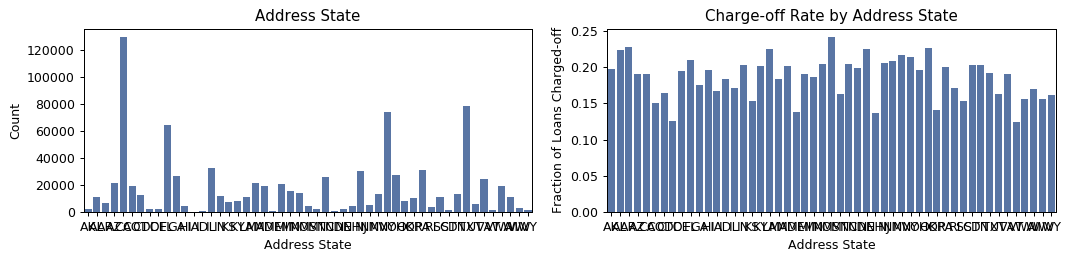

In [54]:
plot_var('addr_state', 'Address State', continuous=False)

3. annual_inc

The summary stats show annual income values range from 0 to 10,999,200 with a median of 65,000. Since the values vary so much we will take a log transform of the feature. We will create a new feature called 'annual_inc_log' and store these values there and then drop the feature annual_inc. 

From the plot it appears that individuals who paid off the loans have slightly higher annual income.
13.lOan _title

In [55]:
df_NewAppl['annual_inc'].describe()

count    888553.000000
mean      65335.405348
std       28820.618072
min           0.000000
25%       44000.000000
50%       60000.000000
75%       82000.000000
max      156186.000000
Name: annual_inc, dtype: float64

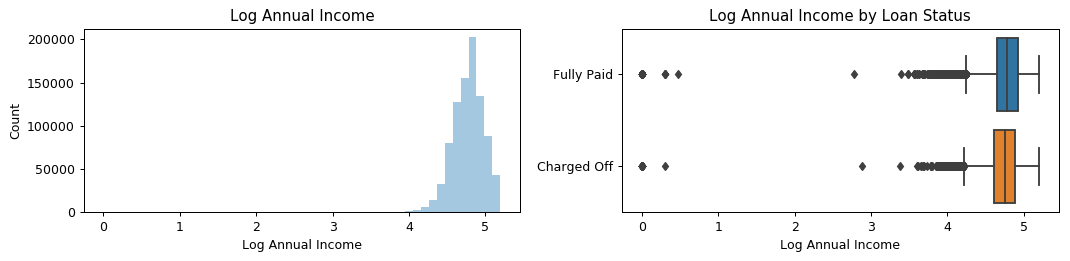

In [56]:
df_NewAppl['annual_inc_log'] = df_NewAppl['annual_inc'].apply(lambda x : np.log10(x+1))
df_NewAppl.drop('annual_inc', axis=1, inplace=True)
plot_var('annual_inc_log', 'Log Annual Income', continuous=True)


In [57]:
print_stats('annual_inc_log', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc_log 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean          4.770651
std           0.213097
min           0.000000
25%           4.643463
50%           4.778158
75%           4.913819
max           5.193645
Name: annual_inc_log, dtype: float64 
 --------------------
Sample Observations 
 1856212    4.653222
2138319    4.602071
1087632    4.505164
573710     4.301052
730345     5.000004
Name: annual_inc_log, dtype: float64 
 --------------------
Number of Uniques 
 46363 
 --------------------
Group_by 
                 count      mean       std  min       25%       50%       75%       max
loan_status                                                                           
Charged Off  170996.0  4.743519  0.212507  0.0  4.612794  4.748196  4.879024  5.193645
Fully Paid   717557.0  4.777117  0.212727  0.0  4.653222  4.778158 

4. loan_amnt




------------------------------------------------------------ 
 Individual Summary Statistics for loan_amnt 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      13211.045824
std        7589.800367
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       38000.000000
Name: loan_amnt, dtype: float64 
 --------------------
Sample Observations 
 2195197     3000
2059192    10000
1796126    18550
514561     15000
1728728    28000
Name: loan_amnt, dtype: int64 
 --------------------
Number of Uniques 
 1431 
 --------------------
Group_by 
                 count          mean          std    min     25%      50%      75%      max
loan_status                                                                               
Charged Off  170996.0  14281.453806  7807.601512  900.0  8000.0  12950.0  20000.0  38000.0
Fully Paid   717557.0  12955.964369  7514.511223  500.0  7000.0  11900.0  18000.0  38000

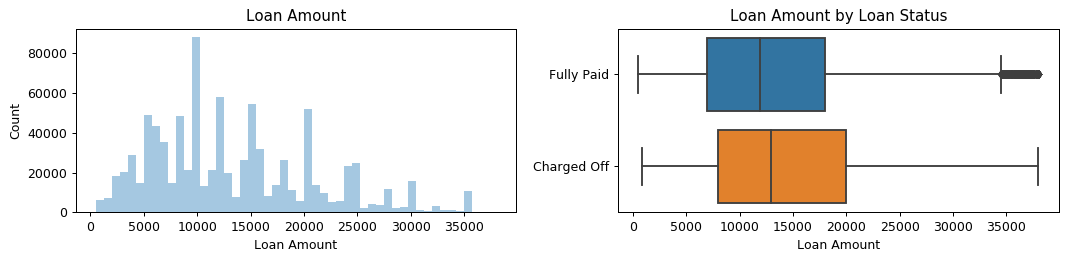

In [58]:
print_stats('loan_amnt', True)
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [59]:
#After plotting we see charged off loans have higher loan amount

5. term

In [60]:
print_stats('term')



------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top        36 months
freq          683990
Name: term, dtype: object 
 --------------------
Sample Observations 
 1752498     36 months
933367      36 months
1089611     60 months
1000144     36 months
1783351     36 months
Name: term, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
  36 months    683990
 60 months    204563
Name: term, dtype: int64 
 --------------------


In [61]:
#Term has values ‘36 months’ or ‘60 months’. We will convert it into integer as follows
df_NewAppl['term'] = df_NewAppl['term'].apply(lambda s: np.int8(s.split()[0]))

In [62]:
df_NewAppl['term'].value_counts(normalize=True) #SHows about 76% of loans have 3 year period and rest are 5 year loans

36    0.76978
60    0.23022
Name: term, dtype: float64

In [63]:
df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#If we focus only on charged off loans, 5 year loans are almost TWICE as likely to go BAD as 3 year loans!!!

term
36    0.155806
60    0.314945
Name: loan_status, dtype: float64

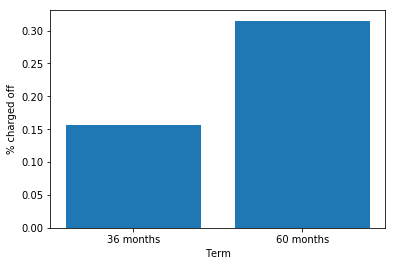

In [64]:
plt.bar(['36 months', '60 months'], height= df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']) 
plt.xlabel('Term')
plt.ylabel('% charged off')
plt.show()


6. Int_rate

In [65]:
print_stats('int_rate', True)


------------------------------------------------------------ 
 Individual Summary Statistics for int_rate 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         12.900300
std           4.378491
min           5.310000
25%           9.490000
50%          12.690000
75%          15.610000
max          25.340000
Name: int_rate, dtype: float64 
 --------------------
Sample Observations 
 1739639    22.70
785519     18.99
2117493    13.80
1315678    15.99
1816897    14.33
Name: int_rate, dtype: float64 
 --------------------
Number of Uniques 
 594 
 --------------------
Group_by 
                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off  170996.0  15.139194  4.254223  5.31  12.12  14.65  18.06  25.34
Fully Paid   717557.0  12.366764  4.236468  5.31   9.16  11.99  14.99  25.34 
 --------------------


Shows int_rate ranges from 5 to 30%!!!

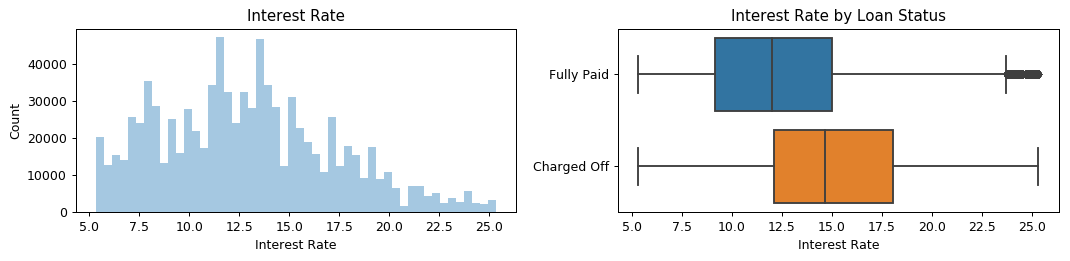

In [66]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Shows charged off loans have much HIGHER interest rate!!

Next let's compare the summary statistics by loan status:

In [67]:
df_NewAppl.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,15.139194,4.254223,5.31,12.12,14.65,18.06,25.34
Fully Paid,717557.0,12.366764,4.236468,5.31,9.16,11.99,14.99,25.34


7. Installment

In [68]:
print_stats('installment')

------------------------------------------------------------ 
 Individual Summary Statistics for installment 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean        398.371542
std         216.407369
min          14.010000
25%         237.520000
50%         355.300000
75%         527.710000
max        1077.890000
Name: installment, dtype: float64 
 --------------------
Sample Observations 
 762748     752.87
1044584     34.18
994599     215.63
714736     996.12
452139     156.74
Name: installment, dtype: float64 
 --------------------
Number of Uniques 
 69342 
 --------------------


In [69]:
#Installments range from $4.93 to $1,719, with a median of $375

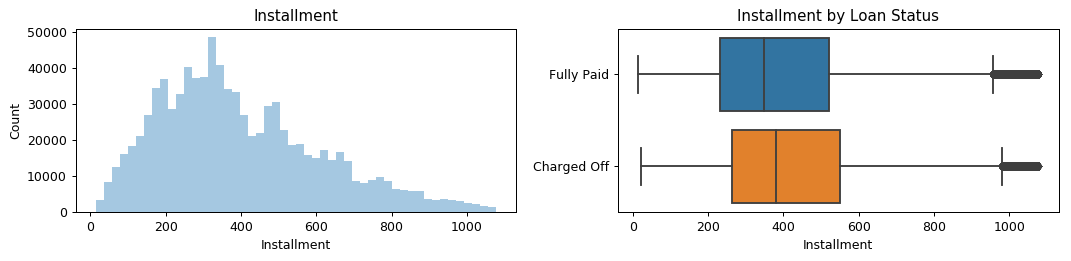

In [70]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [71]:
df_NewAppl.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,420.750440,215.421860,21.62,263.99,379.28,550.68,1077.67
Fully Paid,717557.0,393.038584,216.300353,14.01,230.74,348.18,521.03,1077.89


8. grade
9. sub_grade

In [72]:
print(sorted(df_NewAppl['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [73]:
print(sorted(df_NewAppl['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [74]:
#the grade is implied by the subgrade, so let's drop the grade column.
df_NewAppl.drop('grade', axis=1, inplace=True)

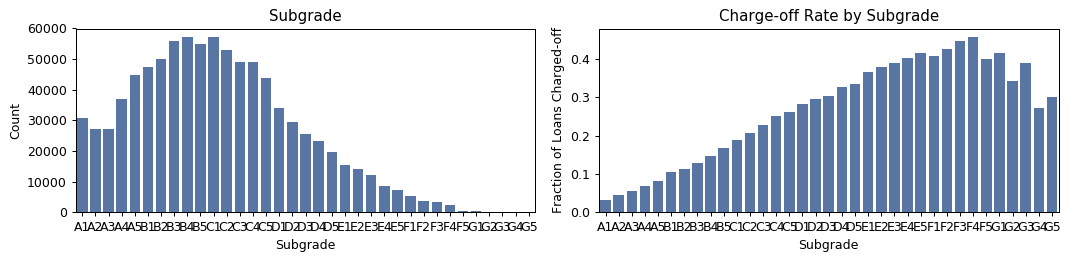

In [75]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade gets worse!

10. emp_title

In [76]:
print_stats('emp_title')

------------------------------------------------------------ 
 Individual Summary Statistics for emp_title 
 ------------------------------------------------------------
Describe 
 count      835115
unique     281839
top       Teacher
freq        14898
Name: emp_title, dtype: object 
 --------------------
Sample Observations 
 2183044                                   Lab tech
1696944    office manager/administrative assistant
2254658                                        NaN
829356                          Operations Manager
1681090                             Sales Exective
Name: emp_title, dtype: object 
 --------------------
Number of Uniques 
 281839 
 --------------------


In [77]:
#There are too many unique values of emp_title to be useful. So we will drop this feature
df_NewAppl.drop(labels='emp_title', axis=1, inplace=True)

11. emp_length

In [78]:
print_stats('emp_length')
df_NewAppl['emp_length'].value_counts(dropna=False).sort_index()

------------------------------------------------------------ 
 Individual Summary Statistics for emp_length 
 ------------------------------------------------------------
Describe 
 count    839903.000000
mean          5.794185
std           3.687045
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64 
 --------------------
Sample Observations 
 1139713    10.0
346288      1.0
2078721     9.0
1344306     6.0
2094305     5.0
Name: emp_length, dtype: float64 
 --------------------
Number of Uniques 
 11 
 --------------------


0.0      75306
1.0      62282
2.0      84558
3.0      74010
4.0      55154
5.0      57332
6.0      42697
7.0      40413
8.0      40368
9.0      33998
10.0    273785
NaN      48650
Name: emp_length, dtype: int64

Note there are 75454 loans with missing value for the length of employment.


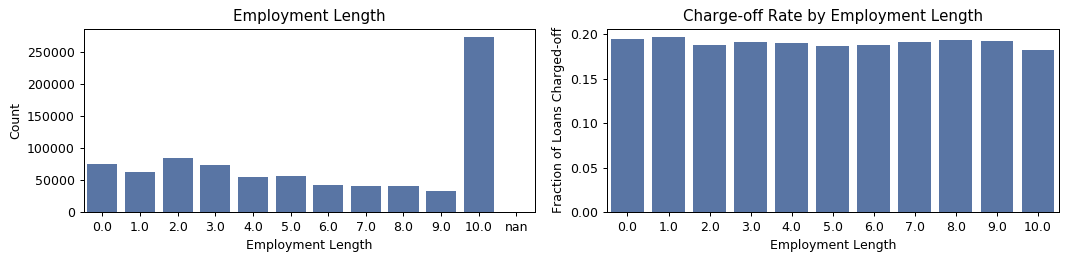

In [79]:
plot_var('emp_length', 'Employment Length', continuous=False)

THere doesn't seem to be significant effect of employment length on loan status
As the plot shows loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

12. home_ownership

In [80]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
ANY            173
OTHER          129
NONE            41
Name: home_ownership, dtype: int64

Let's combine the category ANY and NONO into OTHER

In [81]:
df_NewAppl['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [82]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
OTHER          343
Name: home_ownership, dtype: int64

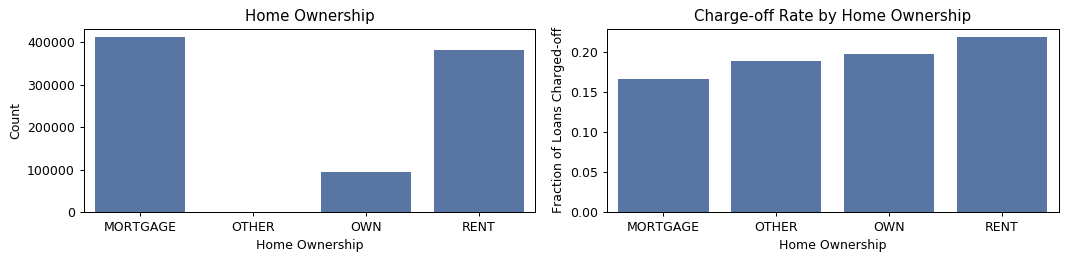

In [83]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appears to be significant differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [84]:

df_NewAppl.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#.plot(kind='bar', color='red')


home_ownership
MORTGAGE    0.166556
OTHER       0.189504
OWN         0.198495
RENT        0.218829
Name: loan_status, dtype: float64

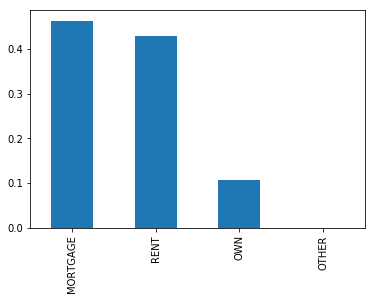

In [85]:
df_NewAppl['home_ownership'].value_counts(dropna=False, normalize = True).plot(kind='bar')

13. application_type
Tells whether the loan application is individual or joint application

From our plot and summary stats we see that - Joint loans are more likely to be charged off than individual loans

In [86]:
print_stats('application_type', True)


print(df_NewAppl.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])
#print(df_NewAppl['loan_status'== 'Charged Off'].groupby('application_type')['loan_status'].value_counts(normalize=True))


------------------------------------------------------------ 
 Individual Summary Statistics for application_type 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top       Individual
freq          876475
Name: application_type, dtype: object 
 --------------------
Sample Observations 
 641560     Individual
2178749    Individual
1023637    Individual
1187559    Individual
2111568    Individual
Name: application_type, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 Individual    876475
Joint App      12078
Name: application_type, dtype: int64 
 --------------------
Group_by 
               count unique         top    freq
loan_status                                   
Charged Off  170996      2  Individual  168210
Fully Paid   717557      2  Individual  708265 
 --------------------
application_type
Individual    0.191916
Joint App     0.230667
Name: loan_status, d

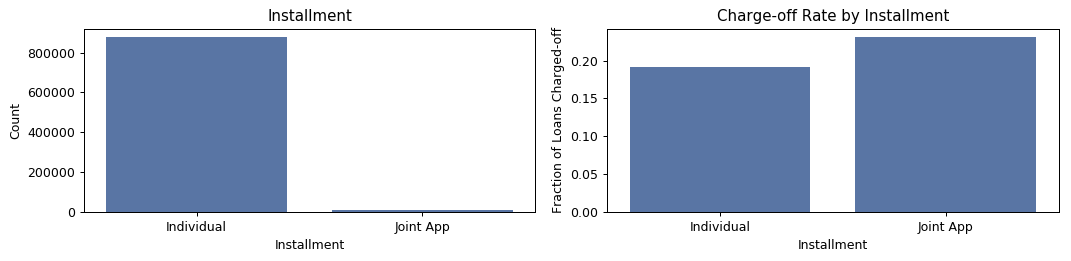

In [87]:
plot_var('application_type', 'Installment', continuous=False)

14. dti : debt to income ratio (debt excluding mortgage and current application debt)

In [88]:
print_stats('dti')

------------------------------------------------------------ 
 Individual Summary Statistics for dti 
 ------------------------------------------------------------
Describe 
 count    888341.000000
mean         18.017513
std           8.280638
min           0.000000
25%          11.840000
50%          17.560000
75%          23.830000
max          42.390000
Name: dti, dtype: float64 
 --------------------
Sample Observations 
 1791862    15.98
1341945    23.24
1986996    15.48
1054547    13.59
1953423    19.70
Name: dti, dtype: float64 
 --------------------
Number of Uniques 
 4222 
 --------------------


There seems to be some outliers. Since the values range from -1 to 999 with 75% values below 24. 


In [89]:
#df_NewAppl.groupby('target')['dti'].value_counts(normalize=True)
df_NewAppl.dti.nunique()

4222

In [90]:
df_NewAppl.shape

(888553, 25)

In [91]:
df_NewAppl[df_NewAppl.dti > 24].dti.count()

216807

15. initial_list_status: Initial listing status of the listing

In [92]:
print_stats('initial_list_status')

------------------------------------------------------------ 
 Individual Summary Statistics for initial_list_status 
 ------------------------------------------------------------
Describe 
 count     888553
unique         2
top            w
freq      498682
Name: initial_list_status, dtype: object 
 --------------------
Sample Observations 
 2054340    f
1827669    w
944927     f
163706     w
1055616    w
Name: initial_list_status, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 w    498682
f    389871
Name: initial_list_status, dtype: int64 
 --------------------


16. mort_acc: number of mortgage accounts

In [93]:
print_stats('mort_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for mort_acc 
 ------------------------------------------------------------
Describe 
 count    847816.000000
mean          1.415173
std           1.727178
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           7.000000
Name: mort_acc, dtype: float64 
 --------------------
Sample Observations 
 502134     0.0
857642     0.0
1922717    0.0
2207160    0.0
1646541    0.0
Name: mort_acc, dtype: float64 
 --------------------
Number of Uniques 
 8 
 --------------------
Unique value counts 
 0.0    383262
1.0    146693
2.0    116594
3.0     83621
4.0     56281
5.0     33534
6.0     18549
7.0      9282
Name: mort_acc, dtype: int64 
 --------------------


17. open_acc: the number of open credit lines in borrower's credit line

In [94]:
print_stats('open_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for open_acc 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         10.724468
std           4.432910
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          23.000000
Name: open_acc, dtype: float64 
 --------------------
Sample Observations 
 821932      5.0
931902      6.0
1114055     9.0
2002849    12.0
981120      8.0
Name: open_acc, dtype: float64 
 --------------------
Number of Uniques 
 24 
 --------------------


18. pub_rec : number of derogatory public accounts

In [95]:
print_stats('pub_rec')

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec 
 ------------------------------------------------------------
Describe 
 count    888553.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pub_rec, dtype: float64 
 --------------------
Sample Observations 
 619018     0.0
2112299    0.0
832042     0.0
1746682    0.0
1863874    0.0
Name: pub_rec, dtype: float64 
 --------------------
Number of Uniques 
 1 
 --------------------
Unique value counts 
 0.0    888553
Name: pub_rec, dtype: int64 
 --------------------


In [96]:
19. pub_rec_bankruptcies: number of public record bankruptcies

SyntaxError: invalid syntax (<ipython-input-96-2a5524992451>, line 1)

In [97]:
print_stats('pub_rec_bankruptcies')
print(df_NewAppl.pub_rec_bankruptcies.value_counts())
print(df_NewAppl.pub_rec_bankruptcies.value_counts(normalize=True))

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec_bankruptcies 
 ------------------------------------------------------------
Describe 
 count    887947.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Sample Observations 
 1090265    0.0
1450051    0.0
895208     0.0
976077     0.0
956430     0.0
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Number of Uniques 
 1 
 --------------------
Unique value counts 
 0.0    887947
Name: pub_rec_bankruptcies, dtype: int64 
 --------------------
0.0    887947
Name: pub_rec_bankruptcies, dtype: int64
0.0    1.0
Name: pub_rec_bankruptcies, dtype: float64


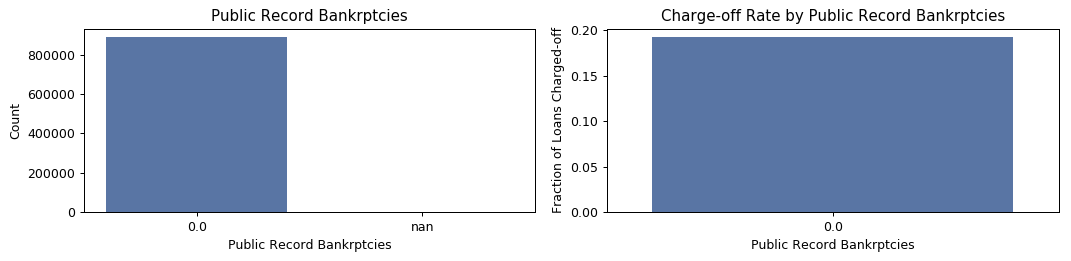

In [98]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankrptcies', continuous=False)

20. purpose: a category provided by the borrower for the loan request

In [99]:
print_stats('purpose')

------------------------------------------------------------ 
 Individual Summary Statistics for purpose 
 ------------------------------------------------------------
Describe 
 count                 888553
unique                    14
top       debt_consolidation
freq                  515529
Name: purpose, dtype: object 
 --------------------
Sample Observations 
 1215184    debt_consolidation
1803197    debt_consolidation
2113126    debt_consolidation
623246     debt_consolidation
613836            credit_card
Name: purpose, dtype: object 
 --------------------
Number of Uniques 
 14 
 --------------------


In [100]:
21. revol_bal: total credit revolving balance

SyntaxError: invalid syntax (<ipython-input-100-fa86d75c58b8>, line 1)

In [ ]:
print_stats('revol_bal')

In [101]:
22. revol_util: revolving line utilization rate or 

SyntaxError: invalid syntax (<ipython-input-101-9ba2d55633d9>, line 1)

In [102]:
print_stats('revol_util')

------------------------------------------------------------ 
 Individual Summary Statistics for revol_util 
 ------------------------------------------------------------
Describe 
 count    887959.000000
mean         52.285071
std          24.641468
min           0.000000
25%          33.900000
50%          52.700000
75%          71.400000
max         126.400000
Name: revol_util, dtype: float64 
 --------------------
Sample Observations 
 1759635    51.6
905173     22.4
1291794    65.0
1287201    81.6
1764466    51.3
Name: revol_util, dtype: float64 
 --------------------
Number of Uniques 
 1272 
 --------------------


In [103]:
23. title

SyntaxError: invalid syntax (<ipython-input-103-b5727e83a7d4>, line 1)

In [104]:
print_stats('title')

------------------------------------------------------------ 
 Individual Summary Statistics for title 
 ------------------------------------------------------------
Describe 
 count                 878511
unique                 51948
top       Debt consolidation
freq                  420893
Name: title, dtype: object 
 --------------------
Sample Observations 
 1750340     DEBT CONSOLE LOAN
2173920    Debt consolidation
1574607    Debt consolidation
1144661                 Other
516337                  Other
Name: title, dtype: object 
 --------------------
Number of Uniques 
 51948 
 --------------------


In [105]:
24. total_acc: the total number of credit lines currently in the borrower's credit line

SyntaxError: invalid syntax (<ipython-input-105-260681ae1884>, line 1)

In [ ]:
print_stats('total_acc')

In [106]:
25. verification_status

SyntaxError: invalid syntax (<ipython-input-106-2826de172603>, line 1)

In [107]:
print_stats('verification_status')

------------------------------------------------------------ 
 Individual Summary Statistics for verification_status 
 ------------------------------------------------------------
Describe 
 count              888553
unique                  3
top       Source Verified
freq               333405
Name: verification_status, dtype: object 
 --------------------
Sample Observations 
 1708376    Source Verified
828918     Source Verified
1422231    Source Verified
536306     Source Verified
2088681    Source Verified
Name: verification_status, dtype: object 
 --------------------
Number of Uniques 
 3 
 --------------------
Unique value counts 
 Source Verified    333405
Not Verified       298469
Verified           256679
Name: verification_status, dtype: int64 
 --------------------


Next we will perform a statistical analysis to establish whether term has a significant impact on the charge backs aka our target variable loan_status

1. Test
We will use Z statistic test for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. term has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. term has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [108]:
print_stats('term')

------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         41.525289
std          10.103377
min          36.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: term, dtype: float64 
 --------------------
Sample Observations 
 579914     36
1571030    36
809364     36
1218808    36
1732266    36
Name: term, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 36    683990
60    204563
Name: term, dtype: int64 
 --------------------


In [109]:
df1 = df_NewAppl[df_NewAppl.term == 36][['loan_status', 'term']].sample(100)
df2 = df_NewAppl[df_NewAppl.term==60][['loan_status', 'term']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [110]:
df_sample.describe()

,term
count,200.000000
mean,48.000000
std,12.030113
min,36.000000
25%,36.000000
50%,48.000000
75%,60.000000
max,60.000000


In [111]:
df_sample.term.value_counts()

60    100
36    100
Name: term, dtype: int64

In [112]:
df_sample.sample(5)

,loan_status,term
1207209,Fully Paid,60
817280,Charged Off,60
1256700,Fully Paid,60
1018373,Charged Off,60
590382,Charged Off,36


In [113]:
df_sample['charge_off'] = df_sample['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)


In [114]:
#next we will find the sample proportions
# number of charge backs for 36 and 60 months term
total_36CB = sum(df_sample[df_sample.term==36].charge_off)
total_60CB = sum(df_sample[df_sample.term==60].charge_off)

total_60 = df_sample[df_sample.term==60].term.count()
total_36 = df_sample[df_sample.term==36].term.count()


In [115]:
print(total_36CB)
print(total_60CB)
print(total_60)
print(total_36)


11
29
100
100


In [116]:
p1 = total_36CB/total_36
p2 = total_60CB/total_60
n1 = total_36
n2 = total_60
confidence_level = 95
p = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt(p * ( 1 - p ) * ( (1/n1) + (1/n2) ))
z = (p1 - p2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = p1-p2-z_critical*SE
ci_high = p1-p2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 0.0014627165866811787
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -0.29087230594797425  to  -0.06912769405202575
Margin of Error is  -0.18


Interpretation:
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample proportions are different i.e. 
    with 95% confidence we can say that term has significant impact on the charge backs 

Next we will perform a statistical analysis to establish whether interest_rate has a significant impact on the charge backs ie our target variable loan_status

1. Test
We will use two sample Z statistic test two sided for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. interest_rate has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. interest_rate has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [117]:
df1 = df_NewAppl[df_NewAppl.loan_status == 'Fully Paid'][['loan_status', 'int_rate']].sample(100)
df2 = df_NewAppl[df_NewAppl.loan_status == 'Charged Off'][['loan_status', 'int_rate']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [118]:
df_sample.describe()

,int_rate
count,200.00000
mean,13.28270
std,4.66036
min,5.32000
25%,9.43000
50%,13.05000
75%,16.66000
max,25.28000


In [119]:
df_sample.loan_status.value_counts()

Charged Off    100
Fully Paid     100
Name: loan_status, dtype: int64

In [120]:
df_sample.sample(5)

,loan_status,int_rate
1879280,Fully Paid,20.99
1582289,Fully Paid,10.42
1109002,Fully Paid,11.53
1707941,Fully Paid,9.25
1271982,Fully Paid,6.39


In [121]:
m1 = np.mean(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])
std1 = np.std(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])

m2 = np.mean(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])
std2 = np.std(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])

n1 = df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'].count()
n2 = df_sample[df_sample.loan_status == 'Charged Off']['int_rate'].count()
confidence_level = 95

SE = np.sqrt( ((std1*std1)/n1) + ((std2*std2)/n2) )


z = (m1 - m2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = m1-m2-z_critical*SE
ci_high = m1-m2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 7.324288286980618e-09
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -4.711856059114555  to  -2.326543940885448
Margin of Error is  -3.5192000000000014


Interpretation:
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample means are different i.e. 
    with 95% confidence we can say that int_rate has significant impact on the charge offs 

In [125]:
df_NewAppl['target'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)

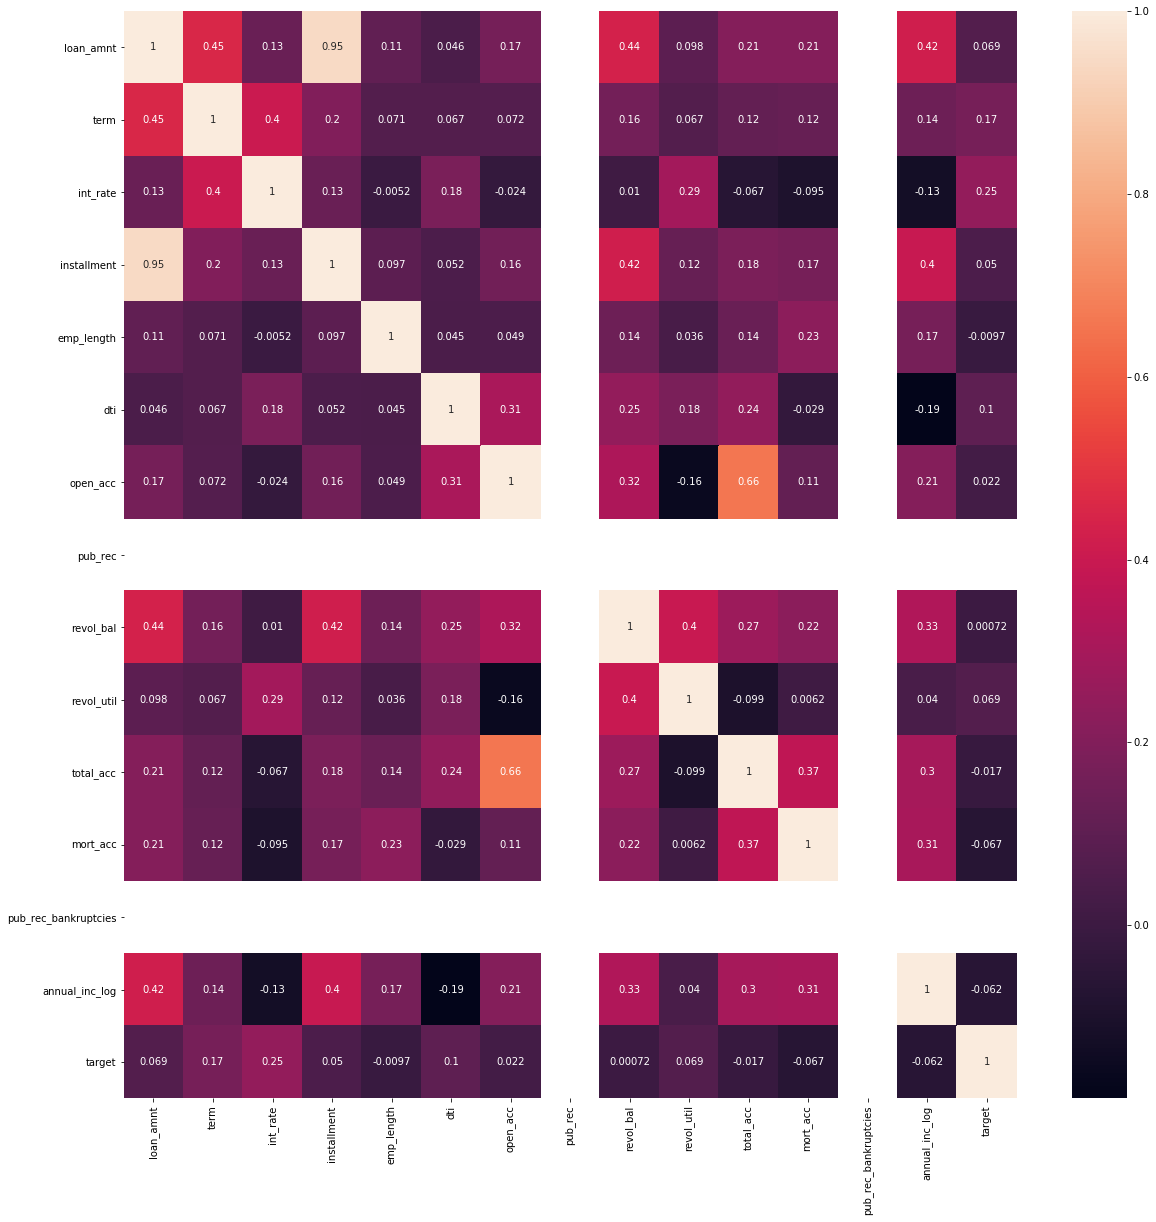

In [126]:
plt.figure(figsize=(20,20))
sns.heatmap(df_NewAppl.corr(), annot=True)

In [123]:
plot_list = ['annual_inc_log', 'application_type', 'dti', 'int_rate', 'loan_amnt', 'loan_status']
df_plot = pd.DataFrame()
df_plot['charge_off'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
df_plot[plot_list] = df_NewAppl[plot_list]

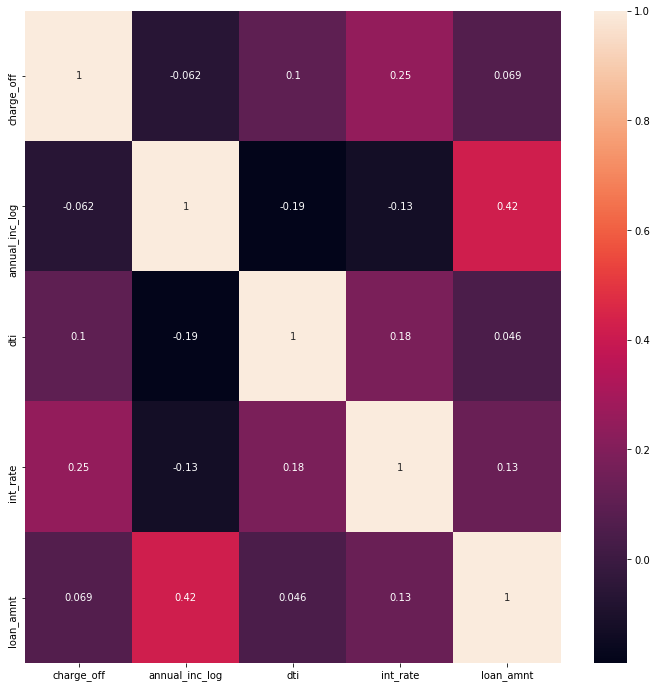

In [124]:
plt.figure(figsize=(12,12))
sns.heatmap(df_plot.corr(), annot=True)

Classification
The aim is to find y , a target variable based on knowing a list of features X. We are trying to predict 'Loan Status' converted to target feature  with values 0 = 'Fully paid' and 1 = 'Charged Off'. SInce target variable takes only 2 values 0 and 1, this will be a binary classification problem.
First we will use 'Logistic Regression'

Training and Test Datasets
When fitting models, we would like to ensure two things:

- We have found the best model (in terms of model parameters).
- The model is highly likely to generalize i.e. perform well on unseen data.

First, we try a basic Logistic Regression:

- Split the data into a training and test (hold-out) set
- Train on the training set, and test for accuracy on the testing set

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_NewAppl[['term','int_rate']].values, 
                                              df_NewAppl.target,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8062204295508668


In [140]:

#1.Use the C and train a Logistic Regression on the training data
clf = LogisticRegression(C=0.001)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
#2.Calculate the accuracy on the test data
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8080301072751745


In [141]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = LogisticRegression(), cv = 5, param_grid = {'C': [0.001, 0.1, 1, 10, 100]})
grid.fit(Xlr, ylr)
print(accuracy_score(grid.predict(Xtestlr), ytestlr))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8080301072751745
